Paper: Global Vectors for Word Representation

 - Derive the semantic relationship between words using word to word co-occurence matrix
 - Unlike word2vec, which depends on local relationships like context to target or target conext, glove depends on global relationships of all the words(co-occurence matrix of all words in the whole dataset)
 - Generates words in the co-occurence matrix based on the window size
 - Co-occurence matric is symmetric.

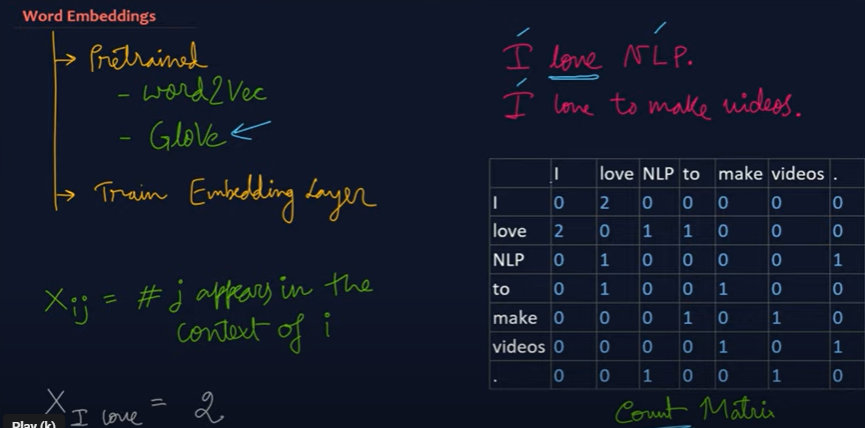

\begin{equation}
P(j|i) = \text{Probability of word j appearing in the context word i} = \frac{X_{ij}}{X_i} = \frac{X_{ij}}{\Sigma_{i=1}^{k} X_{k}}
\end{equation}

## What Is GloVe?

GloVe is an **unsupervised learning algorithm** for obtaining **word embeddings** (vector representations of words). Unlike Word2Vec, which learns word vectors based on local context (e.g. a sliding window), GloVe uses **global word co-occurrence statistics** from a corpus.

GloVe implementation is often based on CRF (Conditional Random Field) which is not only a great application of Hidden Markov Model(HMM)

https://youtu.be/prZMpThbU3E?si=y63eTixr4B1fzFJN

https://youtu.be/fX5bYmnHqqE?si=JJeVwyT-hDvlF9uu

https://youtu.be/rI3DQS0P2fk?si=gItBPq1KcMCrl5lj

---

## Intuition Behind GloVe

- Words that appear in **similar contexts** should have **similar vectors**.
- GloVe uses the **word co-occurrence matrix** — how often each word appears with every other word in a given context window.

Suppose $X_{ij}$ is the number of times word $j$ appears in the context of word $i$.

---

## The Core Idea

The **ratio of co-occurrences** is more informative than raw counts.

> Example: If *ice* co-occurs with *solid* more than with *steam*, and *steam* with *gas* more than with *ice*, we expect:
>
> \begin{equation}
\frac{X_{\text{ice, solid}}}{X_{\text{ice, gas}}} > 1,\quad \frac{X_{\text{steam, solid}}}{X_{\text{steam, gas}}} < 1
\end{equation}

We want word vectors $w_i$, context vectors $\tilde{w}_j$, and biases $b_i$, $\tilde{b}_j$, such that:

\begin{equation}
w_i^T \tilde{w}_j + b_i + \tilde{b}_j \approx \log(X_{ij})
\end{equation}

This is the **GloVe regression model** — we want the dot product of the word and context vectors (plus biases) to approximate the log of co-occurrence counts.

---

## GloVe Loss Function

The full loss function to minimize over the entire co-occurrence matrix is:

\begin{equation}
J = \sum_{i=1}^{V} \sum_{j=1}^{V} f(X_{ij}) \left( w_i^T \tilde{w}_j + b_i + \tilde{b}_j - \log(X_{ij}) \right)^2
\end{equation}

Where:

- V is the vocabulary size
- $f(X_{ij})$ is a **weighting function** that reduces the impact of very frequent word pairs

---

### Weighting Function \( f(x) \)

The **weighting function \( f(x) \)** in **GloVe** plays a crucial role in the **loss function** used during training. It is designed to reduce the effect of very frequent words.

The function is designed to:

- Be **0** when \( x = 0 \) (ignore non-co-occurring words)
- Increase smoothly with \( x \), but **saturate** to avoid overweighting very frequent words (Laplace smoothing)

It is defined as:

\begin{equation}
f(x) =
\begin{cases}
\left( \frac{x}{x_{\text{max}}} \right)^\alpha & \text{if } x < x_{\text{max}} \\
1 & \text{otherwise}
\end{cases}
\end{equation}

Typical hyperparameters:
- $\alpha = 0.75$
- $ x_{\text{max}} = 100 $

Here x is nothing but $X_ij$ is the count of in co-occurence matrix

###  Why use a weighting function in GloVe?

GloVe is trained on a **word co-occurrence matrix**, where each entry \( x \) represents how often word *i* co-occurs with word *j*. But word frequencies follow a **Zipfian distribution** — a few words (like "the", "is", "of") occur *very frequently*, while most words appear rarely.

If we naively used raw co-occurrence counts:

- The model would **overfit to very frequent words**.
- Less frequent but semantically meaningful words would be ignored or underrepresented.

---

### The role of the weighting function \( f(x) \):

The weighting function modifies the loss like this:

\begin{equation}
J = \sum_{i,j=1}^{V} f(X_{ij}) \left( w_i^T \tilde{w}_j + b_i + \tilde{b}_j - \log X_{ij} \right)^2
\end{equation}

#### Key effects of \( f(x) \):

- **Downweights very high \( x \)** (frequent word pairs), so they don't dominate the learning process.
- **Ignores \( x = 0 \)** — i.e., no co-occurrence means no contribution to the loss.
- **Smoothly scales** medium frequencies — balancing learning across the co-occurrence spectrum.

---

### Why this specific form?

\begin{equation}
f(x) =
\begin{cases}
\left( \frac{x}{x_{\text{max}}} \right)^\alpha & \text{if } x < x_{\text{max}} \\
1 & \text{otherwise}
\end{cases}
\end{equation}

- **$\alpha = 0.75$** ensures a smooth but sublinear scaling — popular in NLP for discounting frequencies.
- **$x_{\text{max}} = 100$** sets the point beyond which frequency is considered “too high” and gets capped.


Without the weighting function, GloVe would give too much importance to high-frequency word pairs, skewing the embeddings. The function ensures a **balanced training signal** across all word pairs — making embeddings more meaningful.



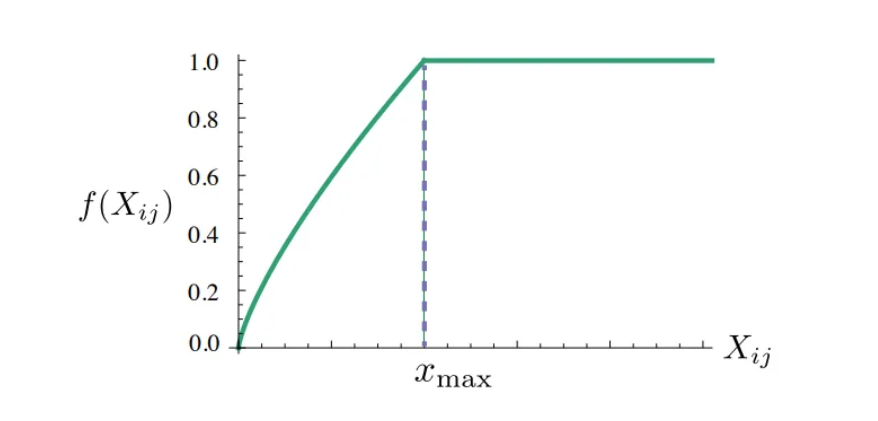

## Final Word Vectors

After training, the **word representation** for a word is usually:

\begin{equation}
v_i = w_i + \tilde{w}_i
\end{equation}

i.e., the sum of the word and its context vector.

---

## Summary

- GloVe builds a **co-occurrence matrix** $X$
- Learns word vectors by minimizing the **log-bilinear regression** loss
- Captures both **syntactic and semantic** properties
- Can perform analogies (e.g. king - man + woman ≈ queen)

---

### Code Skeleton
1. Prepare Data
    - Generate Corpus and create vocab
    - Generate dictionary of id2word and word2index
2. Generate Co-occurence Matrix
    - Create Skipgrams with window size
    - Generate the co-occurence counts from skipgrams
    - Weighting function to scale down frequent words
    - Generate co-occurence matrix and respective weightings
4. Model
    - Embeddings
    - Loss
5. Training
    - Random batch generation
    - Perform Training with optimizer
6. Evaluation
7. GloVe with Gensim

In [58]:
import os
try:
    import gensim
except:
    !pip install gensim
    os.kill(os.getpid(), 9)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
from itertools import combinations_with_replacement

import torch
import torch.nn as nn
from torch.optim import Adam

In [3]:
corpus = ["apple banana fruit",
          "banana apple fruit",
          "banana fruit apple",
          "dog cat animal",
          "cat animal dog",
          "cat dog animal"]

In [4]:
# Tokenization
corpus = [doc.split() for doc in corpus]

In [5]:
corpus

[['apple', 'banana', 'fruit'],
 ['banana', 'apple', 'fruit'],
 ['banana', 'fruit', 'apple'],
 ['dog', 'cat', 'animal'],
 ['cat', 'animal', 'dog'],
 ['cat', 'dog', 'animal']]

In [6]:
# Flatten and generate vocab
flatten = lambda docs: [token for doc in docs for token in doc]
vocab = list(set(flatten(corpus)))
vocab.append("<UNK>")
vocab

['apple', 'animal', 'dog', 'fruit', 'cat', 'banana', '<UNK>']

In [7]:
# Generate dictionary
idx2word = {idx : word for idx, word in enumerate(vocab)}
word2idx = {word:idx for idx, word in idx2word.items()}
idx2word, word2idx

({0: 'apple',
  1: 'animal',
  2: 'dog',
  3: 'fruit',
  4: 'cat',
  5: 'banana',
  6: '<UNK>'},
 {'apple': 0,
  'animal': 1,
  'dog': 2,
  'fruit': 3,
  'cat': 4,
  'banana': 5,
  '<UNK>': 6})

### Build Co-occurence matrix

In [8]:
X_i = Counter(flatten(corpus))  # single word_occurences
X_i

Counter({'apple': 3, 'banana': 3, 'fruit': 3, 'dog': 3, 'cat': 3, 'animal': 3})

In [9]:
# Generate Skipgrams of window size 1
window_size = 1

skipgrams = []
for doc in corpus:
    for i in range(window_size, len(doc)-window_size):
        center_word = doc[i]
        context_words = [doc[i-window_size], doc[i+window_size]]
        # context_words = doc[i-window_size:i+window_size]
        # context_words.remove(center_word)
        for ctx in context_words:
            skipgrams.append((center_word, ctx))
skipgrams

[('banana', 'apple'),
 ('banana', 'fruit'),
 ('apple', 'banana'),
 ('apple', 'fruit'),
 ('fruit', 'banana'),
 ('fruit', 'apple'),
 ('cat', 'dog'),
 ('cat', 'animal'),
 ('animal', 'cat'),
 ('animal', 'dog'),
 ('dog', 'cat'),
 ('dog', 'animal')]

In [10]:
len(skipgrams)

12

In [11]:
# Count the skipgrams co-occurences (generates from skipgrams)
X_ik_skipgrams = Counter(skipgrams)
X_ik_skipgrams

Counter({('banana', 'apple'): 1,
         ('banana', 'fruit'): 1,
         ('apple', 'banana'): 1,
         ('apple', 'fruit'): 1,
         ('fruit', 'banana'): 1,
         ('fruit', 'apple'): 1,
         ('cat', 'dog'): 1,
         ('cat', 'animal'): 1,
         ('animal', 'cat'): 1,
         ('animal', 'dog'): 1,
         ('dog', 'cat'): 1,
         ('dog', 'animal'): 1})

#### Weighting function to scale down frequent words

In [12]:
def weighting(w_i, w_j, X_ik, x_max=100, alpha=0.75):
    """
    Inputs:
        w_i: word_i
        w_j: word_j
        X_ik: co-occurence matrix
    """
    try:
        X_ij = X_ik[(w_i, w_j)]  # check whether the co-occurences between w_i and w_j is available and get the co-occurence count from the matrix
    except:
        X_ij = 1  # 1 # non existing co-occurences - if not exist, then set to 0

    if X_ij < x_max:
        # if co-ocurrence does not exceeed xmax, then just multiply with some alpha
        f_x = (X_ij / x_max) ** alpha
    else:
        # otherwise, set to 1
        f_x = 1
    return f_x

In [13]:
# Example
for bigram in combinations_with_replacement(vocab, 2):
    print(bigram)

('apple', 'apple')
('apple', 'animal')
('apple', 'dog')
('apple', 'fruit')
('apple', 'cat')
('apple', 'banana')
('apple', '<UNK>')
('animal', 'animal')
('animal', 'dog')
('animal', 'fruit')
('animal', 'cat')
('animal', 'banana')
('animal', '<UNK>')
('dog', 'dog')
('dog', 'fruit')
('dog', 'cat')
('dog', 'banana')
('dog', '<UNK>')
('fruit', 'fruit')
('fruit', 'cat')
('fruit', 'banana')
('fruit', '<UNK>')
('cat', 'cat')
('cat', 'banana')
('cat', '<UNK>')
('banana', 'banana')
('banana', '<UNK>')
('<UNK>', '<UNK>')


In [14]:
# Generate co-occurence matrix and their respective weighting

X_ik = {} # co-occurences
weighting_dict = {} # Scale the co-occurences using the weighting function already before training

for bigram in combinations_with_replacement(vocab, 2):
    if X_ik_skipgrams.get(bigram):
        coocs = X_ik_skipgrams[bigram]
        X_ik[bigram] = coocs + 1 # + 1 for numerical stability
        X_ik[(bigram[1], bigram[0])] = coocs + 1  # co-occ matrix is basically symmetric, here,we basically doing apple, banana = banana, apple
    else:
        pass
    weighting_dict[bigram] = weighting(bigram[0], bigram[1], X_ik)
    weighting_dict[(bigram[1], bigram[0])] = weighting(bigram[1], bigram[0], X_ik)

In [15]:
X_ik

{('apple', 'fruit'): 2,
 ('fruit', 'apple'): 2,
 ('apple', 'banana'): 2,
 ('banana', 'apple'): 2,
 ('animal', 'dog'): 2,
 ('dog', 'animal'): 2,
 ('animal', 'cat'): 2,
 ('cat', 'animal'): 2,
 ('dog', 'cat'): 2,
 ('cat', 'dog'): 2,
 ('fruit', 'banana'): 2,
 ('banana', 'fruit'): 2}

In [16]:
weighting_dict

{('apple', 'apple'): 0.03162277660168379,
 ('apple', 'animal'): 0.03162277660168379,
 ('animal', 'apple'): 0.03162277660168379,
 ('apple', 'dog'): 0.03162277660168379,
 ('dog', 'apple'): 0.03162277660168379,
 ('apple', 'fruit'): 0.053182958969449884,
 ('fruit', 'apple'): 0.053182958969449884,
 ('apple', 'cat'): 0.03162277660168379,
 ('cat', 'apple'): 0.03162277660168379,
 ('apple', 'banana'): 0.053182958969449884,
 ('banana', 'apple'): 0.053182958969449884,
 ('apple', '<UNK>'): 0.03162277660168379,
 ('<UNK>', 'apple'): 0.03162277660168379,
 ('animal', 'animal'): 0.03162277660168379,
 ('animal', 'dog'): 0.053182958969449884,
 ('dog', 'animal'): 0.053182958969449884,
 ('animal', 'fruit'): 0.03162277660168379,
 ('fruit', 'animal'): 0.03162277660168379,
 ('animal', 'cat'): 0.053182958969449884,
 ('cat', 'animal'): 0.053182958969449884,
 ('animal', 'banana'): 0.03162277660168379,
 ('banana', 'animal'): 0.03162277660168379,
 ('animal', '<UNK>'): 0.03162277660168379,
 ('<UNK>', 'animal'): 0.0

### Model

In [17]:
class Glove(nn.Module):
    def __init__(self, voc_size, embed_size=2):
        super(Glove, self).__init__()
        self.center_embedding = nn.Embedding(num_embeddings=voc_size, embedding_dim=embed_size)
        self.ctx_embedding = nn.Embedding(num_embeddings=voc_size, embedding_dim=embed_size)

        self.center_bias = nn.Embedding(num_embeddings=voc_size, embedding_dim=1)
        self.ctx_bias = nn.Embedding(num_embeddings=voc_size, embedding_dim=1)

    def forward(self, center, ctx, coocs, weighting):
        xi = self.center_embedding(center)  # bs, 1, embed_size
        xj = self.ctx_embedding(ctx)        # bs, 1, embed_size

        xi_bias = self.center_bias(center).squeeze(dim=1)  # bs, 1, 1 -> bs, 1
        xj_bias = self.ctx_bias(ctx).squeeze(dim=1)        # bs, 1, 1 -> bs, 1
        inner_product = xj.bmm(xi.transpose(1, 2)).squeeze(dim=2)          # (bs, 1, embed_size) (bs, embed_size, 1) -> bs, 1, 1 -> bs, 1
        loss = weighting * torch.pow(inner_product + xi_bias + xj_bias - coocs, 2)
        return torch.sum(loss)



In [36]:
# Test our Moel
voc_size = len(vocab)  # 7
emb_size = 2  # for better plotting
model = Glove(voc_size, emb_size)

x_tensor = torch.LongTensor([[2, 1]])
y_tensor = torch.LongTensor([[3, 4]])
cooc_tensor = torch.FloatTensor([[0.68, 0.5]])
weighting_tensor = torch.FloatTensor([[0.1, 0.2]])

loss = model(x_tensor, y_tensor, cooc_tensor, weighting_tensor)
loss

tensor(2.2844, grad_fn=<SumBackward0>)

#### Batch Generation


In [19]:
# Generate batch
import math
import numpy as np

def batch_generation(batch_skipgrams, X_ik, weighting):
    """
    batch_skipgrams are [(w1, w2), (w3, w1),...]
    """
    inputs, labels, coocs, weightings = [], [], [], []
    # convert our skipgrams to id
    skipgrams_ids = [(word2idx[skip_gram[0]], word2idx[skip_gram[1]]) for skip_gram in batch_skipgrams]
    batch_size = len(batch_skipgrams)

    # Prepare the input and labels
    for idx in range(batch_size):
        inputs.append([skipgrams_ids[idx][0]])
        labels.append([skipgrams_ids[idx][1]])

        # coocs
        pair = batch_skipgrams[idx] # e.g., ('banana', 'fruit')
        try:
            cooc = X_ik[pair]
        except:
            cooc = 1
        coocs.append([math.log(cooc)])

        # weightings
        weighting = weighting_dict[pair]
        weightings.append([weighting])
    return np.array(inputs), np.array(labels), np.array(coocs), np.array(weightings),

In [31]:
# Test the method
batch_skipgrams = skipgrams[0:2]
x, y, cooc, weighting = batch_generation(batch_skipgrams, X_ik, weighting_dict)

In [32]:
x

array([[1],
       [0]])

In [33]:
y

array([[2],
       [5]])

In [34]:
cooc  # logarithmic

array([[0.69314718],
       [0.69314718]])

In [35]:
weighting

array([[0.05318296],
       [0.05318296]])

Note: We can achieve the same using pytorch custom dataset and dataloaders..

```python
from torch.utils.data import Dataset, DataLoader

class SkipGramDataset(Dataset):
    def __init__(self, skipgrams, X_ik, weighting_dict, word2idx):
        self.data = []
        for word1, word2 in skipgrams:
            i = word2idx[word1]
            j = word2idx[word2]
            x = X_ik.get((word1, word2), 1)  # default co-occurrence = 1
            w = weighting_dict.get((word1, word2), 0)  # default weight = 0
            self.data.append((i, j, np.log(x), w))
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        i, j, x, w = self.data[idx]
        return (
            torch.tensor(i, dtype=torch.long),
            torch.tensor(j, dtype=torch.long),
            torch.tensor(x, dtype=torch.float),
            torch.tensor(w, dtype=torch.float)
        )
#Dataset and Dataloader
dataset = SkipGramDataset(skipgrams, X_ik, weighting_dict, word2idx)
dataloader = DataLoader(dataset, batch_size=12, shuffle=True)
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    start = time.time()
    total_loss = 0
    for input_batch, target_batch, cooc_batch, weighting_batch in dataloader:
        optimizer.zero_grad()
        loss = model(input_batch, target_batch, cooc_batch.unsqueeze(1), weighting_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    epoch_mins, epoch_secs = epoch_time(start, time.time())
    print(f"Epoch: {epoch+1:3} | Avg Loss: {total_loss/len(dataloader):.6f} | Time: {epoch_mins}m {epoch_secs}s")
```

### Training

In [25]:
import time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [39]:
import numpy as np

voc_size = len(vocab)  # 7
emb_size = 2  # for better plotting
batch_size = 10 # mini-batch size

# Model
model  = Glove(voc_size, emb_size)
optimizer = Adam(model.parameters(), lr=0.001)

# Training
num_epochs = 5000

for epoch in range(num_epochs):
    start = time.time()
    # Shuffling
    np.random.shuffle(skipgrams)
    total_loss = 0.0

    num_batches = len(skipgrams) // batch_size
    for i in range(num_batches):
        batch_skipgrams = skipgrams[i * batch_size : (i + 1) * batch_size]
        input_batch, target_batch, cooc_batch, weighting_batch = batch_generation(batch_skipgrams, X_ik, weighting_dict)
        input_batch  = torch.LongTensor(input_batch)         #[batch_size, 1]
        target_batch = torch.LongTensor(target_batch)        #[batch_size, 1]
        cooc_batch   = torch.FloatTensor(cooc_batch)         #[batch_size, 1]
        weighting_batch = torch.FloatTensor(weighting_batch) #[batch_size, 1]
        optimizer.zero_grad()
        loss = model(input_batch, target_batch, cooc_batch, weighting_batch)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    end = time.time()
    epoch_mins, epoch_secs = epoch_time(start, end)
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch+1} | Loss: {total_loss / num_batches:.6f} | Time: {epoch_mins}m {epoch_secs}s")


Epoch: 1000 | Loss: 0.007442 | Time: 0m 0s
Epoch: 2000 | Loss: 0.000149 | Time: 0m 0s
Epoch: 3000 | Loss: 0.000000 | Time: 0m 0s
Epoch: 4000 | Loss: 0.000000 | Time: 0m 0s
Epoch: 5000 | Loss: 0.000000 | Time: 0m 0s


### Access and Plot the embeddings

In [44]:
word = "cat"
word_tensor = torch.LongTensor([word2idx[word]])
print(word_tensor.shape) # torch.Size([1])
ctr_embed_w = model.center_embedding(word_tensor)
ctx_embed_w = model.ctx_embedding(word_tensor)
word_embed = (ctr_embed_w + ctx_embed_w) / 2
word_embed, word_embed.shape

torch.Size([1])


(tensor([[-0.9479,  0.6871]], grad_fn=<DivBackward0>), torch.Size([1, 2]))

In [47]:
# Let's write a function to get embedding given a word
def get_embed(word):
    id_tensor = torch.LongTensor([word2idx[word]])
    v_embed = model.center_embedding(id_tensor)
    u_embed = model.ctx_embedding(id_tensor)
    word_embed = (v_embed + u_embed) / 2
    x, y = word_embed[0][0].item(), word_embed[0][1].item()  # coords on 2d plot
    return x, y

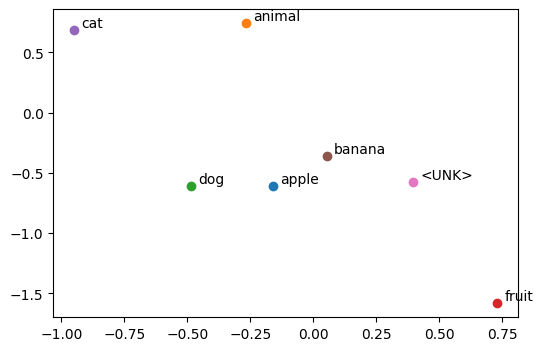

In [49]:
plt.figure(figsize=(6, 4))
for word in vocab:
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(text=word, xy=(x, y), xytext=(5, 2), textcoords="offset points")
plt.show()

### Cosine Similarity

In [50]:
def calculate_similarity(a, b):
    numerator = np.dot(a, b)
    denominator = np.linalg.norm(a) * np.linalg.norm(b)
    sim = numerator / denominator
    return sim

In [52]:
cat = get_embed("cat")
animal = get_embed("animal")
fruit = get_embed("fruit")
# papaya = get_embed("papaya") # retrun keyerror as papaya is not in vocab, we have to make it UNK for unknown vocab

In [53]:
print(f"cat vs. fruit: ", calculate_similarity(cat, fruit))
print(f"cat vs. animal: ", calculate_similarity(cat, animal))
print(f"cat vs. cat: ", calculate_similarity(cat, cat))

cat vs. fruit:  -0.8720539129116193
cat vs. animal:  0.8261160330826486
cat vs. cat:  1.0000000000000002


In [54]:
# scipy version of cosine similarity
from scipy import spatial

def cos_sim(a, b):
    cos_sim = 1 - spatial.distance.cosine(a, b)  # distance = 1 - similarlity, because scipy only gives distance
    return cos_sim

print(f"cat vs. fruit: ",        cos_sim(cat, fruit))
print(f"cat vs. animal: ",       cos_sim(cat, animal))
print(f"cat vs. cat: ",          cos_sim(cat, cat))

cat vs. fruit:  -0.8720539129116194
cat vs. animal:  0.8261160330826485
cat vs. cat:  1.0


### GloVe with Gensim

- Load the trained GloVe embeddings and use those embeddings using Gensim

Link: https://nlp.stanford.edu/projects/glove/

In [2]:
import requests
import os
import zipfile

url = "https://nlp.stanford.edu/data/glove.6B.zip"
save_path = "/content/glove.6B.zip"

if not os.path.exists(save_path):
    with open(save_path, "wb") as f:
        data = requests.get("https://nlp.stanford.edu/data/glove.6B.zip")
        f.write(data.content)

with zipfile.ZipFile(save_path, "r") as zipref:
    zipref.extractall("glove.6B")

In [ ]:
#!pip install --upgrade pandas

In [6]:
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = "glove.6B/glove.6B.100d.txt"

# Load the model
model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

In [7]:
model.most_similar(["king"])

[('prince', 0.7682328820228577),
 ('queen', 0.7507690787315369),
 ('son', 0.7020888328552246),
 ('brother', 0.6985775232315063),
 ('monarch', 0.6977890729904175),
 ('throne', 0.6919989585876465),
 ('kingdom', 0.6811409592628479),
 ('father', 0.6802029013633728),
 ('emperor', 0.6712858080863953),
 ('ii', 0.6676074266433716)]

In [14]:
model["coffee"].shape

(100,)

In [18]:
# model["kdudu"].shape  # keyerror

In [8]:
model.most_similar(["woman"])

[('girl', 0.8472671508789062),
 ('man', 0.832349419593811),
 ('mother', 0.827568769454956),
 ('boy', 0.7720510363578796),
 ('she', 0.7632068395614624),
 ('child', 0.7601762413978577),
 ('wife', 0.7505022883415222),
 ('her', 0.7445706129074097),
 ('herself', 0.7426273822784424),
 ('daughter', 0.726445734500885)]

In [19]:
model.most_similar(["bhavana"])

[('urvashi', 0.608097493648529),
 ('jayasudha', 0.5848761200904846),
 ('nithya', 0.5739824771881104),
 ('boq', 0.5727552175521851),
 ('nayantara', 0.5644240379333496),
 ('padmapriya', 0.5641264915466309),
 ('siberry', 0.5617588758468628),
 ('bhama', 0.558885931968689),
 ('nimmi', 0.5580085515975952),
 ('fassbender', 0.5525108575820923)]

In [20]:
model.most_similar(["prithvi"])

[('agni', 0.6348435878753662),
 ('akash', 0.6239327788352966),
 ('brahmos', 0.5616936087608337),
 ('trishul', 0.5475720763206482),
 ('hypersonic', 0.5457062125205994),
 ('hatf', 0.5454060435295105),
 ('ghauri', 0.5451316833496094),
 ('shahab-3', 0.5356578826904297),
 ('supersonic', 0.5305883288383484),
 ('surface-to-air', 0.5294451117515564)]

In [22]:
model.most_similar(negative=["woman"])

[('ohle', 0.6199492812156677),
 ('methoni', 0.5796119570732117),
 ('___________________________________________________________',
  0.5759642720222473),
 ('shoshani', 0.5756735801696777),
 ('terc', 0.5754066705703735),
 ('gliddon', 0.5751217007637024),
 ('jansma', 0.5745593905448914),
 ('amscan', 0.5733430981636047),
 ('karpus', 0.5725605487823486),
 ('entranceways', 0.5700979828834534)]

In [23]:
model.most_similar(negative=["banana"])

[('shunichi', 0.49618104100227356),
 ('ieronymos', 0.4736502170562744),
 ('pengrowth', 0.4668096601963043),
 ('höss', 0.4636845588684082),
 ('damaskinos', 0.4617849290370941),
 ('yadin', 0.4617374837398529),
 ('hundertwasser', 0.4588957726955414),
 ('ncpa', 0.4577339291572571),
 ('maccormac', 0.4566109776496887),
 ('rothfeld', 0.4523947238922119)]

In [10]:
# Analogy
model.most_similar(positive=["king", "woman"], negative=["man"], topn=1)

[('queen', 0.7698540687561035)]

In [24]:
result = model.most_similar(positive=['italy', 'sushi'], negative=['japan'])
print("{}: {:.4f}".format(*result[0]))

tapas: 0.6232


In [13]:
# doesntmatch
model.doesnt_match(["king", "orange", "girl", "boy"])

'orange'

In [25]:
# Cosine similarity (dist = 1-sim)

w1 = "dog"
w2 = "cat"
w3 = "fruit"

w1_w2_dist = model.distance(w1, w2)
w1_w3_dist = model.distance(w1, w3)

# dog is much closer to cat then dog to fruit
w1_w2_dist, w1_w3_dist  # displaying distance here

(0.1201925277709961, 0.6231490671634674)

In [26]:
w1 = "happy" # synonym 1
w2 = "cheerful" # synonym 2
w3 = "sad" # antonym
w1_w2_dist = model.distance(w1, w2)
w1_w3_dist = model.distance(w1, w3)

#$w_1$="happy" is closer to $w_3$="sad" than to $w_2$="cheerful"!! those similarlity does not handle antonym....
1-w1_w2_dist, 1-w1_w3_dist

(0.5459936261177063, 0.680113673210144)

### Bias from Data
One very important thing is that NLP models are biased.

In [27]:
import pprint

pprint.pprint(model.most_similar(positive=['woman', 'worker'], negative=['man']))

[('nurse', 0.6614274978637695),
 ('employee', 0.6432636976242065),
 ('workers', 0.6231536865234375),
 ('migrant', 0.6021152138710022),
 ('immigrant', 0.5768847465515137),
 ('child', 0.5701467394828796),
 ('nurses', 0.5673794746398926),
 ('pregnant', 0.5660357475280762),
 ('nursing', 0.5648376941680908),
 ('teacher', 0.5609064102172852)]


In [28]:
pprint.pprint(model.most_similar(positive=['man', 'worker'], negative=['woman']))

[('employee', 0.6741486191749573),
 ('workers', 0.6706238985061646),
 ('working', 0.6157787442207336),
 ('factory', 0.5970541834831238),
 ('farmer', 0.5912193059921265),
 ('mechanic', 0.5748481154441833),
 ('laborer', 0.564391553401947),
 ('job', 0.5637211203575134),
 ('strike', 0.5605738759040833),
 ('labor', 0.5600941181182861)]


In [29]:
pprint.pprint(model.most_similar(positive=["woman", "doctor"], negative=["man"]))

[('nurse', 0.7735227942466736),
 ('physician', 0.7189430594444275),
 ('doctors', 0.6824328303337097),
 ('patient', 0.6750683188438416),
 ('dentist', 0.6726033091545105),
 ('pregnant', 0.6642459630966187),
 ('medical', 0.6520450115203857),
 ('nursing', 0.645348072052002),
 ('mother', 0.63933265209198),
 ('hospital', 0.6387495994567871)]


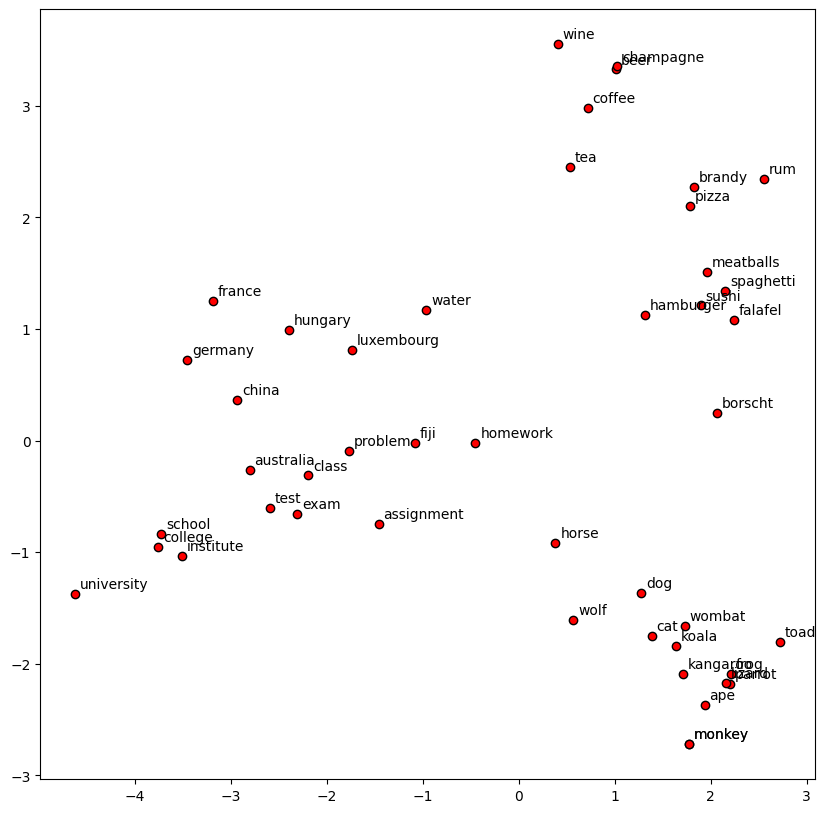

In [30]:
# Visualization using PCA
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

words = ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
        'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
        'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
        'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
        'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
        'homework', 'assignment', 'problem', 'exam', 'test', 'class',
        'school', 'college', 'university', 'institute']

word_vectors = np.array([model[w] for w in words])

twodim = PCA(n_components=2).fit_transform(word_vectors)  #transform 100 to 2 dimensions

plt.figure(figsize=(10, 10))
plt.scatter(twodim[:, 0], twodim[:, 1], edgecolors='k', c='r')
for word, (x, y) in zip(words, twodim):
    plt.text(x + 0.05, y + 0.05, word)
plt.show()

Setting up default gensim download directory in local
```python
import os
os.environ['GENSIM_DATA_DIR'] = 'C:/username/gensim-data'
```
We can use gensim downloader for downloading, getting information and loading datasets/models

```python
import gensim.downloader as api
model = api.load('word2vec-google-news-300') # load glove vectors
model = api.load("glove-twitter-25")  # load glove vectors
dataset = api.load("text8")  # load dataset as iterable
api.info("text8")  # retrieve information about text8 dataset
```

Load trained glove embeddings without gensim
---
```python
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = list(map(float, values[1:]))
            embeddings[word] = vector
    return embeddings

# Example usage:
glove_file = "glove.6B/glove.6B.100d.txt"
glove_embeddings = load_glove_embeddings(glove_file)

# Check vector
print(glove_embeddings["king"][:10])  # print first 10 values of "king"

# Use these trained embeddings in our model

# Create word2idx Dictionary, Assuming you already have a vocabulary from your dataset
vocab = ["<pad>", "<unk>", "king", "queen", "man", "woman", ...]
word2idx = {word: i for i, word in enumerate(vocab)}

# Build the embedding matrix
embedding_dim = 100  # Match the GloVe version you're using
embedding_matrix = np.zeros((len(word2idx), embedding_dim))

for word, idx in word2idx.items():
    vector = glove_embeddings.get(word)
    if vector is not None:
        embedding_matrix[idx] = vector
    else:
        embedding_matrix[idx] = np.random.normal(scale=0.6, size=(embedding_dim,))

# Convert to Pytorch nn.Embedding
embedding_tensor = torch.tensor(embedding_matrix, dtype=torch.float)
embedding_layer = nn.Embedding.from_pretrained(embedding_tensor, freeze=False)

# freeze=False: allows the embedding weights to be fine-tuned during training.
# freeze=True: keeps GloVe vectors fixed (useful for static embeddings).

# Use in the model
idx_tensor = torch.tensor([word2idx["king"], word2idx["queen"]])  # [2, 3]
embedded = embedding_layer(idx_tensor)
print(embedded.shape)  # torch.Size([2, 100])

```

### Optional: Add `<unk>` and `<pad>` Handling
Ensure unknown or padding tokens are handled by placing them at known indices and using padding_idx in the nn.Embedding layer if needed.

Padding tokens are special tokens added to input sequences in Natural Language Processing (NLP) to ensure they all have the same length, which is a requirement for many machine learning models. These tokens are typically zeros or a specific token like [PAD]